In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('InstagramDatasetRegression.csv', encoding='utf-8-sig')

In [7]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('number_of_likes/mean')) #Remove b from list
df = df[cols+['number_of_likes/mean']]

In [9]:
df.get_dtype_counts()

bool        4
float64     6
int64      37
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20668 entries, 0 to 20667
Data columns (total 47 columns):
edge_felix_video_timeline                      20668 non-null int64
edge_follow                                    20668 non-null int64
edge_followed_by                               20668 non-null int64
edge_owner_to_timeline_media                   20668 non-null int64
highlight_reel_count                           20668 non-null int64
is_business_account                            20668 non-null bool
is_verified                                    20668 non-null bool
comments_disabled                              20668 non-null bool
is_video                                       20668 non-null bool
time_between                                   20668 non-null float64
Friday                                         20668 non-null int64
Monday                                         20668 non-null int64
Saturday                                       20668 non-null int64
Sunday   

In [14]:
df[['edge_follow', 'edge_followed_by', 'edge_owner_to_timeline_media', 'mean_likes', 'mean_comments', 'number_of_likes/mean']].describe()

,edge_follow,edge_followed_by,edge_owner_to_timeline_media,mean_likes,mean_comments,number_of_likes/mean
count,20668.000000,2.066800e+04,20668.000000,2.066800e+04,20668.000000,20668.000000
mean,597.421183,8.379184e+06,2396.159667,2.982312e+05,3599.452535,1.000000
std,784.615460,1.611271e+07,3257.285681,5.217894e+05,12625.473183,0.506869
min,0.000000,8.000000e+00,2.000000,8.571429e-01,0.000000,0.000000
25%,140.000000,5.090398e+05,617.000000,9.423795e+03,110.090909,0.680820
50%,383.000000,4.139918e+06,1380.000000,1.464275e+05,834.090909,0.939907
75%,770.000000,1.024219e+07,2959.000000,3.949574e+05,3455.454545,1.219336
max,7246.000000,2.940083e+08,40472.000000,9.909698e+06,350137.000000,5.987419


In [16]:
corr = df.corr()["number_of_likes/mean"]
corr[np.argsort(corr, axis = 0)[::-1]]

number_of_likes/mean                           1.000000e+00
hr_cos                                         3.234267e-02
Saturday                                       3.135588e-02
Sunday                                         2.769917e-02
time_between                                   2.534327e-02
(16, 20]                                       2.291578e-02
hour_of_day                                    1.575312e-02
(20, 24]                                       1.495409e-02
Monday                                         9.703935e-03
Friday                                         9.506759e-03
(0, 4]                                         8.727016e-03
Content & Apps                                 5.573668e-18
highlight_reel_count                           4.590565e-18
Business & Utility Services                    4.387472e-18
edge_follow                                    4.267122e-18
edge_followed_by                               2.891275e-18
Creators & Celebrities                  

In [22]:
df = df.rename(columns={'number_of_likes/mean': 'number_of_likes_over_mean'})

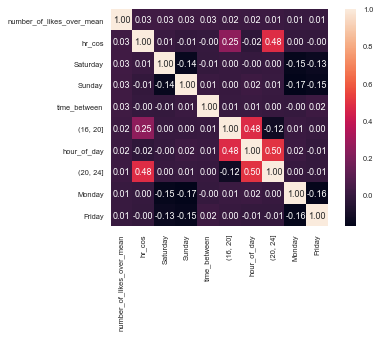

In [25]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'number_of_likes_over_mean').index
columns
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=0.75)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [26]:
correlations=df.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

C:\Users\guiza\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,Attribute Pair,Correlation
1,"(hour_of_day, hr_sin)",-0.815784
6,"(Creators & Celebrities, is_business_account)",0.748046
5,"(mean_comments, mean_likes)",0.649453
4,"((4, 8], hr_sin)",0.600908
3,"((16, 20], hr_sin)",-0.568493
7,"(edge_followed_by, mean_likes)",0.551244
0,"((8, 12], hr_cos)",-0.551196
2,"((0, 4], hour_of_day)",-0.518755
8,"((20, 24], hour_of_day)",0.502076


In [31]:
df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','number_of_likes_over_mean']].groupby(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],
as_index=False).mean().sort_values(by='Sunday', ascending=False)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,number_of_likes_over_mean
0,0,0,0,0,0,0,1,1.035169
1,0,0,0,0,0,1,0,1.044171
2,0,0,0,0,1,0,0,1.012899
3,0,0,0,1,0,0,0,0.937058
4,0,0,1,0,0,0,0,0.985147
5,0,1,0,0,0,0,0,0.991661
6,1,0,0,0,0,0,0,1.011682


In [36]:
df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','(0, 4]', '(4, 8]', '(8, 12]', '(12, 16]', '(16, 20]','(20, 24]','number_of_likes_over_mean']].groupby(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday','(0, 4]', '(4, 8]', '(8, 12]', '(12, 16]', '(16, 20]','(20, 24]'],
as_index=False).mean().sort_values(by='Sunday', ascending=False)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,"(0, 4]","(4, 8]","(8, 12]","(12, 16]","(16, 20]","(20, 24]",number_of_likes_over_mean
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.946323
2,0,0,0,0,0,0,1,0,0,0,0,1,0,1.022107
3,0,0,0,0,0,0,1,0,0,0,1,0,0,1.028300
4,0,0,0,0,0,0,1,0,0,1,0,0,0,1.044590
5,0,0,0,0,0,0,1,0,1,0,0,0,0,1.062349
6,0,0,0,0,0,0,1,1,0,0,0,0,0,1.044381
1,0,0,0,0,0,0,1,0,0,0,0,0,1,1.008331
38,0,1,0,0,0,0,0,0,0,0,1,0,0,0.965020
30,0,0,1,0,0,0,0,0,0,0,0,1,0,1.033259
31,0,0,1,0,0,0,0,0,0,0,1,0,0,1.005242


In [ ]:
'Auto Dealers', 'Business & Utility Services', 'Content & Apps', 'Creators & Celebrities', 'Food & Personal Goods', 'General Interest', 'Government Agencies', 'Grocery & Convenience Stores', 'Home & Auto', 'Home Goods Stores', 'Home Services', 'Lifestyle Services', 'Local Events', 'Non-Profits & Religious Organizations', 'Personal Goods & General Merchandise Stores', 'Professional Services', 'Publishers', 'Transportation & Accomodation Services'

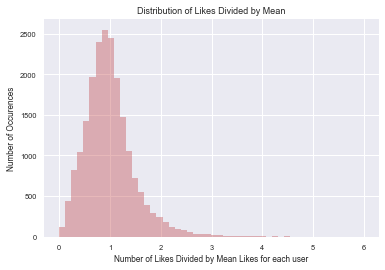

In [42]:
sns.distplot(df['number_of_likes_over_mean'], color="r", kde=False)
plt.title("Distribution of Likes Divided by Mean")
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Likes Divided by Mean Likes for each user");

In [43]:
df['number_of_likes_over_mean'].skew()

1.6034886243477915

In [44]:
df['number_of_likes_over_mean'].kurt()

6.1955849734846602

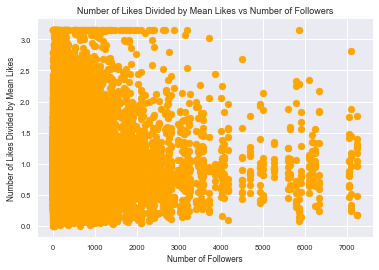

In [53]:
plt.scatter(df['edge_follow'], df["number_of_likes_over_mean"], color='orange')
plt.title("Number of Likes Divided by Mean Likes vs Number of Followers")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Likes Divided by Mean Likes");